## __Titanic - Machine Learning from Disaster__

I am not a expert in data science. This is my second try in this competition after lot of researches. There might be some issues. I hope you like this. These all written by myself and please leave a comment.. 

#### __Workflow Stages__

1. Problem definition.
2. Acquire training and testing data.
3. Wrangle, Prepare, Cleanse the data.
4. Analyze, identify patterns and explore the data.
5. Model, Predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.

* We may combine multiple workflow stages. We may analyze by visualizing data.
* Perform a stage earlier than indicated. We may analyze data before and after wrangling.
* Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.
* We may drop a stage altogether

#### __Problem definition__

Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### __Workflow goals__

The datascience solutions workflow solves for seven major goals.

__Classifing__. We may want to classify or categorize our samples. We may also want to undestand the implications or correlations of different classes with ourr solution goals

__Correlation__. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

__Converting__. For modelling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all feature to be converted to numerical equivalent values. So for instance converting text categorical values to numerical values.

__Completing__. Data preparation may also require us to estimate any missing values within a feature. Model algorithm may work best when there are no missing values.

__Correcting__. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the result.

__Creating__. Can we create new feature based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

__Charting__. How to slect the right visualization plots and charts depending on nature of the data and the solution goals.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


#### __Acquire data__

Import train and test data sets using python pandas library and we create a variable called combine with combining train and test data sets together.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

#### __Analize data by describing__

With pandas library we can use it to answer following questions.

__Which features are available in the dataset?__

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


__Which features are categorical?__

These values classify the samples into sets of similar samples. (nominal, ordinal, ratio, interval based)

* Categorical
    * Survived
    * Sex
    * Embarked
* Ordinal
    * Pclass

__Which features are numerical?__

These values change from sample to sample. (Discrete, Continuous, Timeseries based)

* Continuous
    * Age
    * Fare
* Discrete
    * SibSp
    * Parch

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Which features are mixed types?__

Numerical, alphanumerical data whithin same feature.

* Numerical and alphanumerical
    * Ticket
* Aplhanumerical
    * Cabin

__Which features may contain errors or typos?__

This can tell this by reviewing some samples.

* Name feature may contain errors or typos because there are several ways used in describing a name. (titles, round brackets, quots)

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__Which features contain blank, null or empty values?__

* In train data set,
    * Age 177
    * Cabin 687
    * Embarked 2
* In test data set,
    * Age 86
    * Cabin 327

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

__What are the data types for various features.?__

* 7 features are integer or float
* 5 features are objects (strings)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__What is the distribution of numerical future values across the sample?__

* This dataset has 891 samples of data amoung actual number of passengers on the board (2,224)
* Around 38% of samples represent survived
* Most passengers > 75% did not travel with their parents or childrens.
* Nearly 30% passengrs had siblingsand/or spouse aboard. 
* A very few elderly passengers withing age range 65-80

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__What is the distribution of categorical futures?__

* All names are unique
* Sex variable have 2 possible values (Male:577, Female:314)
* Ticket future has 681 unique values
* Saveral passengers shared their cabins there are several duplicates
* Embarked has 3 possible values and S is mostly used port (freq=644)

In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### __Assumtions based on data analysis__

We arrived following assumtions based on data analysis so far.

* __Correlation__:
    We want to know how well does each feature correlate with Survival.

* __Completing__:
    * We want to complete the age it is correlated with survival
    * And Embarked feature also correlated with survival. So we should complete that

* __Creating__:
    * We may want to create a new feature called family base on SibSp and Parch columns
    * We may want to extract the title from name feature and create a new column
    * We may want to create a new column named age brand. This turns a continuous numerical value to ordinal categotical feature
    * We may want to create a fare rage feature

#### __Analyze by pivolating features__

We can analyze our future correlations by pivolating features against each other.We can only do this with non empty value features. So we can use Sex(categorical), Pclass(ordinal), SibSp(discrete) features.

* __Pclass__ We can observe significant correlation (>0.5) among Pclass=1 and Survived. So we decide to include this feature in our model

* __Sex__ We can see female passangers had higher survival rate(74%). So Sex feature is important to our model

* __SibSp and Parch__ These features have zero correlation for certain values. It may be best ot derive a feature or a set of features from these individual features.

In [11]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=False)

,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
2,2,0.464286
1,1,0.535885
0,0,0.345395


In [14]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=False)

,Parch,Survived
6,6,0.000000
5,5,0.200000
4,4,0.000000
3,3,0.600000
2,2,0.500000
1,1,0.550847
0,0,0.343658


#### __Analyze by visualizing data__

We can continue our assumptions using visualizing data

__Correlation numerical features__

* __Observations__
    * Age <= had higher survival rate
    * Large number of 15-30 years olds did not survive
    * Most passengers are in 15-35 range
    * Oldest passengers around 80 years old survived

* __Decisions__
    * Use age feature to model training.
    * Complete the null values in age feaure
    * Band age groups

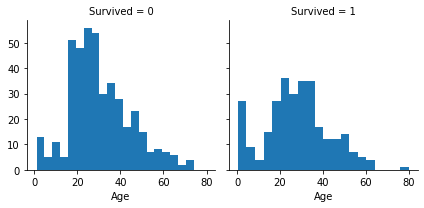

In [15]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

__Correlation numerical and ordinal features__

We can combine multiple features for identify correlation using a single plot. This can be done with numerical and categorical features which have numeric values

* __Observation__
    * In Pclass 1 most passengers survived
    * In Pclass 2 around half of passengers survived.
    * In Pckass 3 most passengers not survived and there were most passengers
    * Pclass varies in term of Age distribution of passengers

* __Decisions__
    * Consider Pclass for model training

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


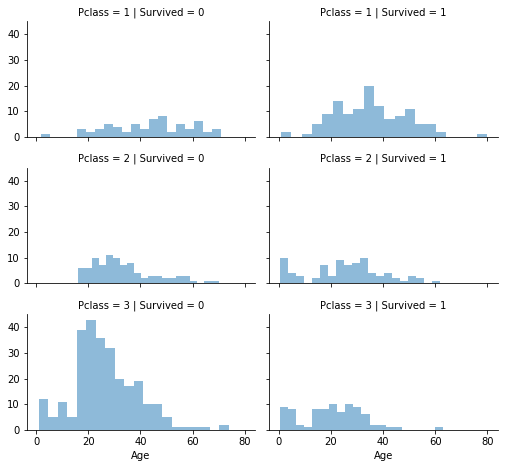

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

__Correlation categorical features__

* __Observation__
    * Female passengers had much better survival rate than male
    * In Embarked C male had higher survival rate. 
    * Males had brtter survival rate in Pclass 3 when compare with Pclass 2 for C and Q ports
    * Posts of Embarked have varying survival rate for Pclass 3 and among male passengers.

* __Decisions__
    * Add Sex feature fot model training.
    * Complete and add Embarked feature for model training

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


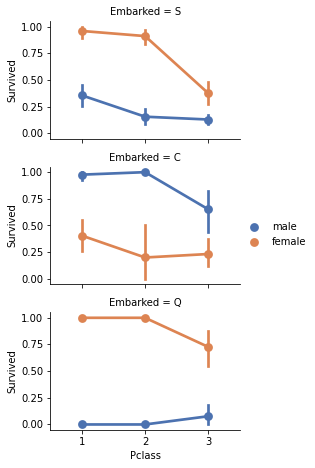

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

__Correlation categorical and numerical features__

We may also want to correlate categorical features (with non-numeric values) and numerical features. We can consider correlating Embarked (categorical non-numeric), Sex(categorical non-numeric), Fare(Numeric continuous), Survived(Categorical numeric)

* __Observations__
    * Higher fare paying passengers had higher survival rate
    * Port of embark is correlated with survival rate

* __Decisions__
    * consider Fare feature for our model training
    * Create a Fare range feature

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


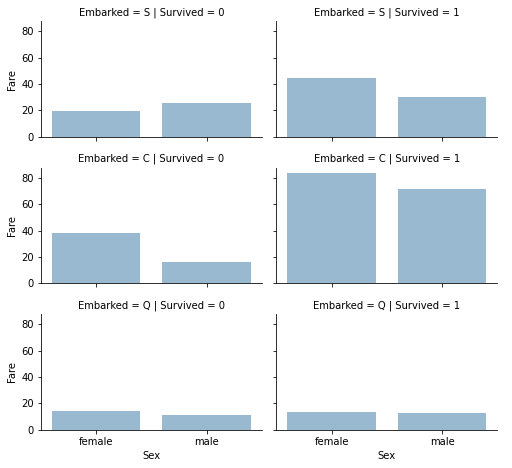

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

#### __Wrangle data__

We have collected several assumptions and decisions regarding our datasets and solution requrements. So far we did not change any value or any feature. Lets execute our decisions and assumptions for correcting, creating, and completing goals.

__Correcting by dropping features__

Based on our assumptions we want to drop Cabin and Ticket features. 

In [19]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [20]:
train_df.shape, test_df.shape

((891, 10), (418, 9))

__Creating new feature extracting from existing__

Before dropping Name feature, We want to create a new feature called Titile from analyzing the existing Name feature.

* __Observation__
    * Survival among Title brands varies slightly
    * Certain titles (Rare) has low survival rate
    

* __Decisions__
    * Consider new Title feature for model training

In [21]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace less common titles with common titles or mark them as Rare

In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Done'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal

In [23]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5 }
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [24]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3.0


It seems the Title feature in test_df is a float value. So lets conver it into int

In [25]:
test_df['Title'] = test_df['Title'].astype(int)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassangerId feature in training set

In [26]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df =  test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

__Converting a categorical feature__

We can convert features which contain string, to numerical values. This is necessary step for model training.

In [27]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


__Completing a numerical continuous feature__

Now we should fill null empty values. There are several ways doing that

1. Generate random value between mean and standard deviation.
2. Guessing missing values by using other correlated features.(Gender, Pclass)
3. Combining 1 and 2 methods and use random value between mean and std base on set of Pclass and Gender combinations

Method 1 and 3 will introduce random noise into our models. So results might vary. We will use method 2

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


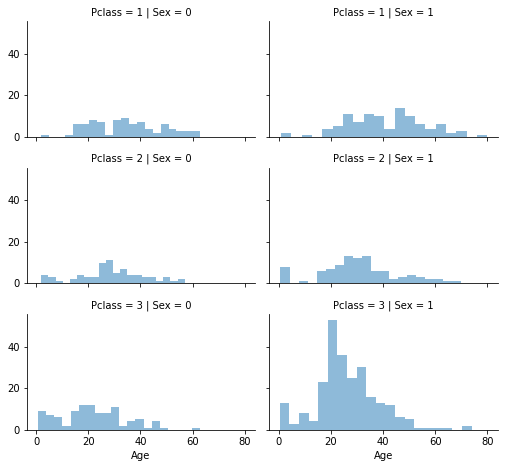

In [28]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Lets make a empty array contain guessed age based on Pclass and Sex

In [29]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now iterate over Sex(0,1) and Pclass(1,2,3) to calculate guessed values of Age for 6 combinations

In [30]:
for dataset in combine:
    for s in range(0,2):
        for p in range(0,3):
            guess_df = dataset[(dataset['Sex'] == s) & (dataset['Pclass'] == p+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[s,p] = int(age_guess/0.5+0.5)*0.5

    for s in range(0,2):
        for p in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == s) & (dataset.Pclass == p+1), 'Age'] = guess_ages[s,p]

    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1


Let's create a age brands and determine correlation with survival

In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinal based on these bands.

In [61]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,0,0,0,1,0,3
1,1,1,0,0,3,1,3,0,2
2,1,3,0,0,1,0,2,1,3
3,1,1,0,0,3,0,3,0,2
4,0,3,1,0,1,0,1,1,6


We can remove the AgeBand feature.

In [33]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,S,1
1,1,1,0,2,1,0,71.2833,C,3
2,1,3,0,1,0,0,7.9250,S,2
3,1,1,0,2,1,0,53.1000,S,3
4,0,3,1,2,0,0,8.0500,S,1


__Create new feature combining existing features__

We can create a new feature called FamilySize by combining Parch and SibSp features

In [34]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone

In [35]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Lets drop Parch, SibSp and FamilySize features in favor of IsAlone

In [36]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,1,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [37]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


__Completing a categorical feature__

Our training dataset has two missing values.We simply fill these with the most common occurance

In [38]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


__Convert categorical features to numeric__

We can convert categorical values in Embarked feature to numeric

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,7.2500,0,1,0,3
1,1,1,0,2,71.2833,1,3,0,2
2,1,3,0,1,7.9250,0,2,1,3
3,1,1,0,2,53.1000,0,3,0,2
4,0,3,1,2,8.0500,0,1,1,6


__Completing and converting a numerica feature__

We can fill missing values in fare feature using mode to get the value that occurs most frequently for this feature

In [41]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

Lets create a fare band

In [42]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert fare feature to ordinal values based on FareBand

In [43]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,0,0,1,0,3
1,1,1,0,2,3,1,3,0,2
2,1,3,0,1,1,0,2,1,3
3,1,1,0,2,3,0,3,0,2
4,0,3,1,2,1,0,1,1,6
5,0,3,1,1,1,2,1,1,3
6,0,1,1,3,3,0,1,1,3
7,0,3,1,0,2,0,4,0,0
8,1,3,0,1,1,0,3,0,3
9,1,2,0,0,2,1,3,0,0


In [44]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,0,2,1,1,6
1,893,3,0,2,0,0,3,0,6
2,894,2,1,3,1,2,1,1,6
3,895,3,1,1,1,0,1,1,3
4,896,3,0,1,1,0,3,0,3
5,897,3,1,0,1,0,1,1,0
6,898,3,0,1,0,2,2,1,3
7,899,2,1,1,2,0,1,0,2
8,900,3,0,1,0,1,3,1,3
9,901,3,1,1,2,0,1,0,3


#### __Model train, predict and slove__

Now our dataset is looking good and we have to train the model. Then we can use the model to slove the problem solution. There are many model algorithms to use. But our problem is classification and reggression problem in supervised learning. So we can use these models.

* Logistic Reggression
* KNN
* Support vector mask
* Naive bayes classifier
* Decision tree
* Random forest
* Preception
* Artificial neural network
* RVM

Now we should categorize our data into train and test data

In [45]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1)
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Lets we check each model algorithm one by one. And check the score

In [46]:
#  Lodistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(round(logreg.score(X_train, y_train)*100,2),'%')

80.36 %


In [47]:
# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(round(knn.score(X_train, y_train)*100,2),'%')

84.06 %


c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
# Support vector machines
svc = SVC()
svc.fit(X_train, y_train)
print(round(svc.score(X_train, y_train)*100,2),'%')

78.23 %


In [49]:
# Gaussian Naive bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
print(round(gaussian.score(X_train, y_train)*100,2),'%')

72.28 %


In [50]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print(round(perceptron.score(X_train, y_train)*100,2),'%')

79.24 %


In [51]:
# Linear SVC
linearsvc = LinearSVC()
linearsvc.fit(X_train, y_train)
print(round(linearsvc.score(X_train, y_train)*100,2),'%')

79.12 %


c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [52]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print(round(sgd.score(X_train, y_train)*100,2),'%')

75.31 %


In [53]:
# Decision Tree
decisiontr = DecisionTreeClassifier()
decisiontr.fit(X_train, y_train)
print(round(decisiontr.score(X_train, y_train)*100,2),'%')

86.76 %


In [54]:
# Random forest
rndforest = RandomForestClassifier(n_estimators=100)
rndforest.fit(X_train, y_train)
print(round(rndforest.score(X_train, y_train)*100,2),'%')

86.76 %


#### __Model tuning__

Lets try these different models with different parameters and find the best algorithm for our solution

In [55]:
# define a dictionary for models and their parameters
model_param = {
    'svc': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'gaussian' :{
        'model' : GaussianNB(),
        'params' : {
            
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [1,3,5,7,9]
        }
    },
    'tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
        }
    },
    'perceptron' : {
        'model' : Perceptron(),
        'params' : {
            'penalty' : ['l2','l1','elasticnet']
        }
    },
    'linearsvc' : {
        'model' : LinearSVC(),
        'params' : {
                 
        }
    },
    'sgd' : {
        'model' : SGDClassifier(),
        'params' : {

        }
    }
}

In [56]:
#find the best model
scores = []
for model_name, mp in model_param.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Anjana Kavidu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken wil

,model,best_score,best_params
0,svc,0.810325,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.794613,{'n_estimators': 10}
2,logistic_regression,0.808081,{'C': 10}
3,gaussian,0.640853,{}
4,knn,0.802469,{'n_neighbors': 7}
5,tree,0.800224,{'criterion': 'entropy'}
6,perceptron,0.747475,{'penalty': 'l1'}
7,linearsvc,0.792368,{}
8,sgd,0.626263,{}


#### __Model training and predict__

So according to above chart we can see SVC is the best scored model with these parameters. So let's use that to train our model.

In [57]:
model = SVC(C=20, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

__Submission__

Lets do our submission

In [58]:
submission = pd.DataFrame({
    'PassengerId':test_df['PassengerId'],
    'Survived':y_pred
})
submission.to_csv('submission.csv', index=False)

In [59]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
